# 1. Chuẩn bị dữ liệu

In [18]:
import pandas as pd

## Đọc dữ liệu rượu đỏ

In [19]:
from pathlib import Path
data_path = Path(r'D:\PTDL\LAB1_PTDL\xu_ly_truc_quan_hoa_du_lieu\bai_thuc_hanh_1\data\winequality-red.csv')
if not data_path.exists():
    raise FileNotFoundError(f'CSV file not found at: {data_path} - check the path or the data folder')
wine_data = pd.read_csv(data_path)
print('Loaded', len(wine_data), 'rows; columns:', list(wine_data.columns))
wine_data.head()

Loaded 1599 rows; columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Giải thích:
- Dữ liệu gồm 1599 mẫu rượu đỏ, với 11 đặc trưng hóa học (như alcohol, volatile acidity, citric acid, sulphates...) và cột quality (chất lượng, từ 3 đến 8).
- Trong báo cáo, ta chỉ tập trung vào một số biến quan trọng để phân tích mối quan hệ với chất lượng rượu.

# 2. Trực quan hóa dữ liệu với Matplotlib

## Case 1: Histogram phân bố điểm chất lượng

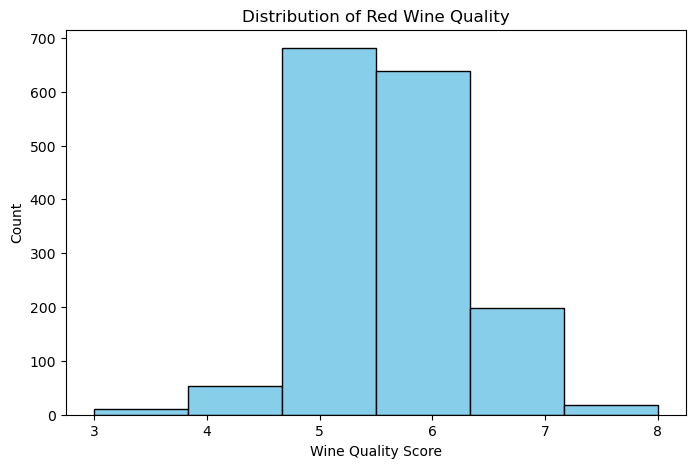

In [20]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8,5)) 
plt.hist(wine_data['quality'], bins=6, color='skyblue', edgecolor='black') 
plt.xlabel("Wine Quality Score") 
plt.ylabel("Count") 
plt.title("Distribution of Red Wine Quality") 
plt.show()

### Giải thích:
- Biểu đồ histogram cho thấy phần lớn rượu có chất lượng trung bình (điểm 5 và 6).
- Rượu chất lượng cao (7–8) chiếm tỷ lệ nhỏ.

## Case 2: Boxplot so sánh nồng độ cồn theo chất lượng

<Figure size 800x600 with 0 Axes>

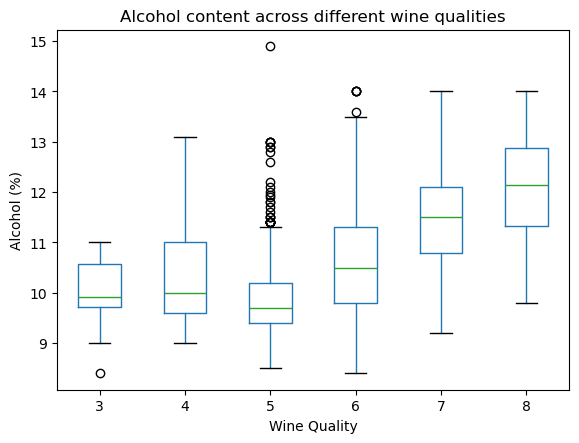

In [21]:
plt.figure(figsize=(8,6)) 
wine_data.boxplot(column='alcohol', by='quality', grid=False) 
plt.suptitle("") 
plt.xlabel("Wine Quality") 
plt.ylabel("Alcohol (%)") 
plt.title("Alcohol content across different wine qualities") 
plt.show()

### Giải thích:
- Hàm lượng cồn (alcohol) tăng dần theo mức chất lượng rượu.
- Rượu ngon thường có nồng độ cồn cao hơn.

## Case 3: Biểu đồ cột trung bình độ chua dễ bay hơi (volatile acidity)

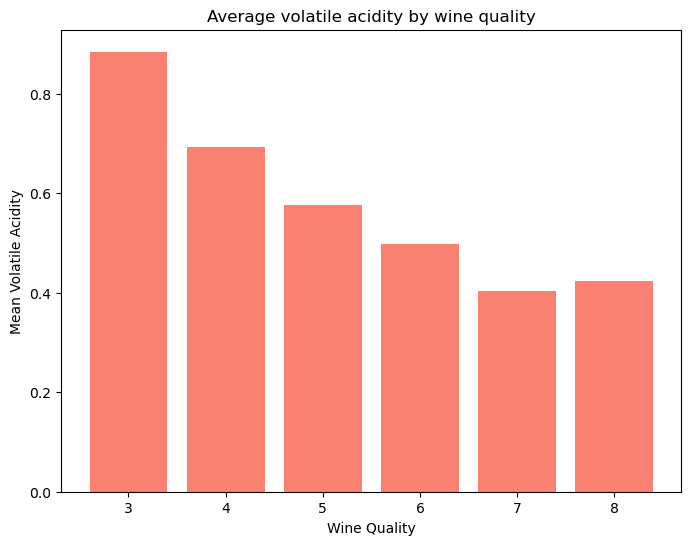

In [22]:
quality_mean = wine_data.groupby('quality')['volatile acidity'].mean() 
plt.figure(figsize=(8,6)) 
plt.bar(quality_mean.index, quality_mean.values, color='salmon') 
plt.xlabel("Wine Quality") 
plt.ylabel("Mean Volatile Acidity") 
plt.title("Average volatile acidity by wine quality") 
plt.show()

### Giải thích:
- Độ chua dễ bay hơi (volatile acidity) giảm khi chất lượng tăng.
- Rượu ngon thường có độ chua dễ bay hơi thấp.

# 3. Trực quan hóa dữ liệu với Seaborn

In [23]:
import seaborn as sns

## Case 1: Countplot số lượng rượu theo điểm chất lượng

C:\Users\Bao\AppData\Local\Temp\ipykernel_34300\2588951924.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=wine_data, x='quality', palette="Blues")


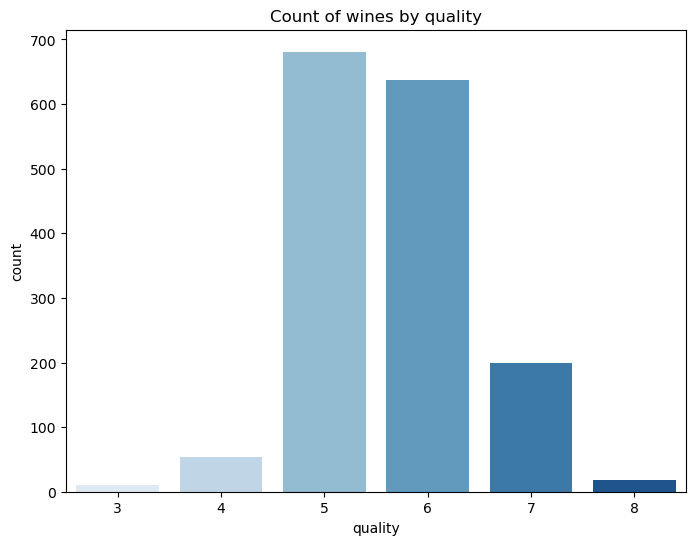

In [24]:
plt.figure(figsize=(8,6)) 
sns.countplot(data=wine_data, x='quality', palette="Blues") 
plt.title("Count of wines by quality") 
plt.show()

### Giải thích:
Xác nhận phần lớn rượu có điểm 5–6, cho thấy chất lượng trung bình là phổ biến nhất trong dữ liệu.

## Case 2: Biểu đồ scatter giữa Alcohol và Quality

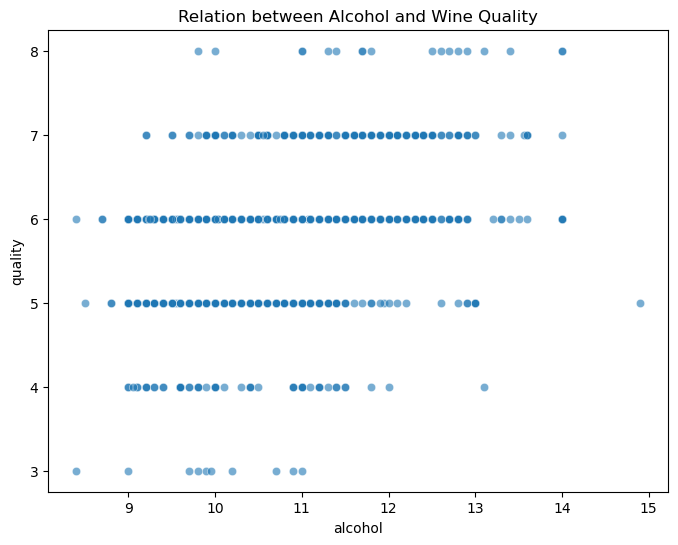

In [25]:
plt.figure(figsize=(8,6)) 
sns.scatterplot(data=wine_data, x='alcohol', y='quality', alpha=0.6)
plt.title("Relation between Alcohol and Wine Quality") 
plt.show()

### Giải thích:
Điểm chất lượng cao tập trung ở rượu có nồng độ cồn cao, trong khi rượu có nồng độ cồn thấp thường bị đánh giá kém.

## Case 3: Heatmap tương quan giữa các biến

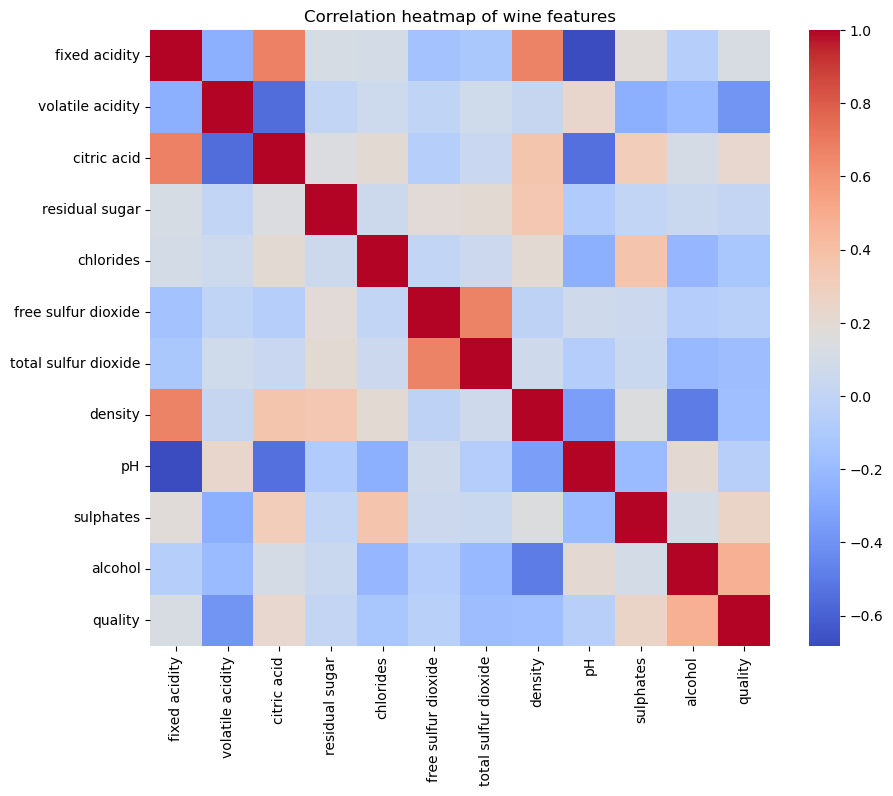

In [26]:
plt.figure(figsize=(10,8)) 
corr = wine_data.corr() 
sns.heatmap(corr, cmap="coolwarm", annot=False) 
plt.title("Correlation heatmap of wine features") 
plt.show()

### Giải thích:
Biến alcohol, sulphates, citric acid có tương quan dương với quality, còn volatile acidity có tương quan âm mạnh. Điều này gợi ý rằng:
- Hàm lượng cồn, sulphates và citric acid càng cao thì khả năng rượu được đánh giá ngon càng lớn.
- Độ chua dễ bay hơi cao làm giảm chất lượng rượu.

# KẾT THÚC